In [ ]:
#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import seaborn as sns
from datetime import datetime

#API
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude (install pip citypy)
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [3]:
# Generate City List

num_locations = 2000

lats = np.random.uniform(low=-90.000, high=90.000, size = num_locations)
lngs = np.random.uniform(low=-180.000, high=180.000, size = num_locations)

lat_lngs = zip(lats, lngs)

num_cities = 500

city_names = []

#get city names and check number of cities 

for lat_lng in lat_lngs:
    
    cityname = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Determine new city name
    if (cityname not in city_names):
        city_names.append(cityname)

        if (len(city_names) == num_cities):
            break

print(f'Number of city names is {len(city_names)}')



Number of city names is 500


In [4]:
# API Call 

api_key = api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
# Create empty list for weather values
# Set today's date
weather_list = []
record_count = 0
todays_date = datetime

for item in city_names:
    
    try:
        record_count += 1
        
        # query for each city 
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + item.replace(" ", "+")
        current_weather = requests.get(query_url).json()
        print(f"Processing Record {record_count} | {item}")
        
        # New weather dictionary
        
        City = current_weather["name"]
        Date = todays_date
        Lats = current_weather["coord"]["lat"]
        Lngs = current_weather["coord"]["lon"]
        Temp = current_weather["main"]["temp"]
        Weather = current_weather["main"]["humidity"]
        Cloudiness = current_weather["clouds"]["all"]
        Wind = current_weather["wind"]["speed"]
        
        weather_list.append({"City": City, "Lats": Lats, "Lngs": Lngs, "Temp": Temp, "Weather": Weather, "Cloudiness": Cloudiness, "Wind": Wind})

    except:
        print(f'{item} not found.')
        continue


Processing Record 1 | kedrovyy
Processing Record 2 | rikitea
Processing Record 3 | puerto ayora
Processing Record 4 | bredasdorp
Processing Record 5 | castro
Processing Record 6 | esperance
Processing Record 7 | bethel
Processing Record 8 | loreto
Processing Record 9 | linhares
Processing Record 10 | mahebourg
Processing Record 11 | albany
Processing Record 12 | tuktoyaktuk
Processing Record 13 | zhangjiakou
Processing Record 14 | arraial do cabo
Processing Record 15 | koumra
Processing Record 16 | ushuaia
Processing Record 17 | mataura
Processing Record 18 | port alfred
Processing Record 19 | atakpame
Processing Record 20 | taolanaro
taolanaro not found.
Processing Record 21 | chunian
Processing Record 22 | bengkulu
bengkulu not found.
Processing Record 23 | norman wells
Processing Record 24 | barentsburg
barentsburg not found.
Processing Record 25 | bluff
Processing Record 26 | saint-philippe
Processing Record 27 | mujiayingzi
Processing Record 28 | busselton
Processing Record 29 | l

Processing Record 237 | grindavik
Processing Record 238 | belushya guba
belushya guba not found.
Processing Record 239 | rawson
Processing Record 240 | meulaboh
Processing Record 241 | zhuhai
Processing Record 242 | mamallapuram
Processing Record 243 | jever
Processing Record 244 | pochutla
Processing Record 245 | dalby
Processing Record 246 | camacha
Processing Record 247 | davila
Processing Record 248 | fairbanks
Processing Record 249 | asnaes
Processing Record 250 | darnah
Processing Record 251 | lavrentiya
Processing Record 252 | oranjemund
Processing Record 253 | chekhov
Processing Record 254 | valle hermoso
Processing Record 255 | baculin
Processing Record 256 | mahon
Processing Record 257 | crib point
Processing Record 258 | naberera
Processing Record 259 | uvat
Processing Record 260 | iracoubo
Processing Record 261 | souillac
Processing Record 262 | grand gaube
Processing Record 263 | amderma
amderma not found.
Processing Record 264 | vila velha
Processing Record 265 | oum hadj

Processing Record 470 | ergani
Processing Record 471 | gold coast
Processing Record 472 | smolyaninovo
Processing Record 473 | hervey bay
Processing Record 474 | tumannyy
tumannyy not found.
Processing Record 475 | gastonia
Processing Record 476 | batagay-alyta
Processing Record 477 | petropavlovsk-kamchatskiy
Processing Record 478 | novobirilyussy
Processing Record 479 | krasnoselkup
krasnoselkup not found.
Processing Record 480 | banjar
Processing Record 481 | samarai
Processing Record 482 | pinczow
Processing Record 483 | maymyo
Processing Record 484 | dakar
Processing Record 485 | teacapan
Processing Record 486 | nalut
Processing Record 487 | bud
Processing Record 488 | okandja
okandja not found.
Processing Record 489 | roebourne
Processing Record 490 | yong peng
Processing Record 491 | wodonga
Processing Record 492 | port elizabeth
Processing Record 493 | sobolevo
Processing Record 494 | pisco
Processing Record 495 | eldorado
Processing Record 496 | north bend
Processing Record 49

In [8]:
df = pd.DataFrame(weather_list)

df.head()

,City,Cloudiness,Lats,Lngs,Temp,Weather,Wind
0,Kedrovyy,0,56.17,91.82,46.40,42,8.95
1,Rikitea,48,-23.12,-134.97,81.01,97,14.58
2,Puerto Ayora,0,-0.74,-90.35,79.66,100,6.31
3,Bredasdorp,0,-34.53,20.04,64.51,67,12.01
4,Castro,20,-42.48,-73.76,48.20,93,4.70


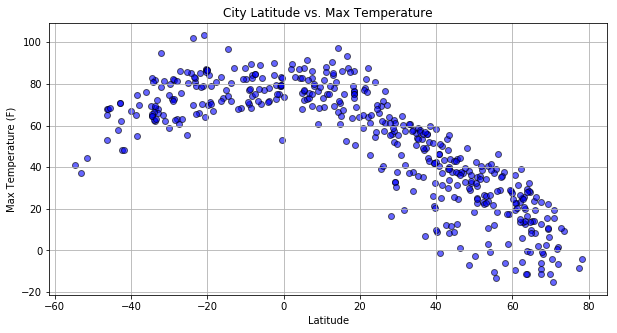

In [10]:
# Temp v. Latitude 

plt.figure(figsize = (10, 5))

plt.scatter(df['Lats'], df['Temp'], marker='o', 
            facecolors='blue', edgecolors='black', alpha= .6)


#- Set Chart Metadata
plt.title(f'City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()


plt.show()
